# Session 4: Burrow's Delta

In this session, we’ll perform a stylometric analysis on historical text data. We’ll use Burrow's Delta to build a classification model that attributes literary works to their respective authors based on unique writing styles.

**To-Do**  
Before the session, make sure all of the following packages are installed by running the cell below while using your Anaconda environment as the kernel.

In [66]:
!pip install pandas scikit-learn plotly nbformat matplotlib

## 1. Step: Preparing the data

We’ll be conducting the stylometric analysis using classic German literature, including works by well-known authors such as Goethe, Schiller, and others.

The following CSV file, provided via Moodle, contains 553 German belletristic texts sourced from the Deutsches Textarchiv (DTA).

> The DTA offers cross-disciplinary and cross-genre collections and corpora of German-language texts. Its core corpus of around 1,500 titles serves as the foundation for a reference corpus of Modern High German.  
> https://www.deutschestextarchiv.de

Each document was originally downloaded as an individual XML file from [https://www.deutschestextarchiv.de/download](https://www.deutschestextarchiv.de/download). The XML files were parsed and cleaned of archaic German characters. The CSV contains the processed texts we’ll be working with.

In [67]:
# Quick Task

# Load the csv
import pandas as pd
corpus = pd.read_csv("./dta_literatur.csv")
corpus

,original_path,surname,forename,title,subtitle,volume,year,text
0,./dta_kernkorpus_belletristik_2021-05-13/nette...,Nettelbeck,Joachim,"Joachim Nettelbeck, Bürger zu Colberg","Eine Lebensbeschreibung, von ihm selbst aufgez...",Drittes Bändchen,1823,"W as ich früher, als ich am Schlusse des Zweit..."
1,./dta_kernkorpus_belletristik_2021-05-13/walle...,Wallenrodt,Johanna Isabella Eleonore von,"Fritz, der Mann wie er nicht seyn sollte oder ...",Ein unterhaltender Roman von ihm selbst erzählt,Erster Theil,1800,"Erster Abschnitt, welcher statt einer Vorrede ..."
2,./dta_kernkorpus_belletristik_2021-05-13/kleis...,Kleist,Heinrich von,Das Käthchen von Heilbronn oder die Feuerprobe,ein großes historisches Ritterschauspiel. Aufg...,Unbekannt,1810,"Erster Act . Scene : Eine unterirdische Höhle,..."
3,./dta_kernkorpus_belletristik_2021-05-13/pocci...,Pocci,Franz von,Lustiges Komödienbüchlein,Unbekannt,Sechstes Bändchen,1877,"Undine, die Wassernixe. Romantische Sage in 4 ..."
4,./dta_kernkorpus_belletristik_2021-05-13/absch...,Abschatz,Hans Assmann von,Poetische Ubersetzungen und Gedichte,Unbekannt,Unbekannt,1704,FreyherrlichAbschatzisches EhrenGedächtniß. Al...
...,...,...,...,...,...,...,...,...
548,./dta_kernkorpus_belletristik_2021-05-13/hippe...,Hippel,Theodor Gottlieb von,Lebensläufe nach Aufsteigender Linie,"nebst Beylagen A, B, C",Meines Lebenslaufs Dritter Theil. Erster Band.,1781,"W ir sprachen kein lebendiges Wort, als ob’s t..."
549,./dta_kernkorpus_belletristik_2021-05-13/stieb...,Stieber,Georg Friedrich,"Leben Des Hertzogs Magni zu Mecklenburg, Erste...",Unbekannt,Unbekannt,1716,§. 1. D A eine gründliche Gelehrsamkeit auch d...
550,./dta_kernkorpus_belletristik_2021-05-13/goeth...,Goethe,Johann Wolfgang von,Faust,Eine Tragödie,Unbekannt,1808,"Zueignung . Ihr naht euch wieder, schwankende ..."
551,./dta_kernkorpus_belletristik_2021-05-13/stift...,Stifter,Adalbert,Bunte Steine,Ein Festgeschenk,Erster Band,1853,Vorrede. Es ist einmal gegen mich bemerkt word...


In [68]:
# Quick Task

# Get an overview of the authors
surnames_counts = corpus['surname'].value_counts()
surnames_counts

surname
Goethe       18
Jean Paul    15
Bodmer       12
Fontane       9
Arnim         9
             ..
Stieler       1
Krüger        1
Fouqué        1
Olearius      1
Stieber       1
Name: count, Length: 227, dtype: int64

As we know, Burrow's Delta works by comparing a given text to others. To calculate similarities and attribute authorship, we need reference material for each author.  
This approach doesn't make sense for authors who only appear once in the dataset, so we need to filter out those cases.

In [69]:
list_of_frequent_authors = surnames_counts[surnames_counts > 5].index
list_of_frequent_authors

Index(['Goethe', 'Jean Paul', 'Bodmer', 'Fontane', 'Arnim', 'Tieck',
       'Richardson', 'Brockes', 'Keller', 'Klopstock', 'Schulz', 'Zachariae',
       'Schlegel', 'Rückert', 'Schiller', 'Hofmannswaldau', 'Heine',
       'Laukhard', 'Börne', 'Pocci'],
      dtype='object', name='surname')

In [70]:
corpus = corpus[corpus['surname'].isin(list_of_frequent_authors)]
corpus

,original_path,surname,forename,title,subtitle,volume,year,text
3,./dta_kernkorpus_belletristik_2021-05-13/pocci...,Pocci,Franz von,Lustiges Komödienbüchlein,Unbekannt,Sechstes Bändchen,1877,"Undine, die Wassernixe. Romantische Sage in 4 ..."
9,./dta_kernkorpus_belletristik_2021-05-13/pocci...,Pocci,Franz von,Lustiges Komödienbüchlein,Unbekannt,Band 1,1859,Prinz Rosenroth und Prinzessin Lilienweiß oder...
17,./dta_kernkorpus_belletristik_2021-05-13/goeth...,Goethe,Johann Wolfgang von,Aus meinem Leben,Dichtung und Wahrheit,Zweyter Theil,1812,Sechstes Buch . II. 1 So trieb es mich wechsel...
18,./dta_kernkorpus_belletristik_2021-05-13/arnim...,Arnim,Bettina von,Die Günderode,Unbekannt,Zweiter Theil,1840,Wenn Dich eine höhere Vorstellung durchdringt ...
21,./dta_kernkorpus_belletristik_2021-05-13/goeth...,Goethe,Johann Wolfgang von,Die Leiden des jungen Werthers,Unbekannt,Erster Theil,1774,"am 4. May. 1771. W ie froh bin ich, daß ich we..."
...,...,...,...,...,...,...,...,...
531,./dta_kernkorpus_belletristik_2021-05-13/brock...,Brockes,Barthold Heinrich,Physikalische und moralische Gedanken über die...,"Nebst seinen übrigen nachgelassenen Gedichten,...",Neunter und letzter Theil,1748,BetrachBetrachtungen über die drey Reiche der ...
533,./dta_kernkorpus_belletristik_2021-05-13/hoffm...,Hofmannswaldau,Christian Hofmann von,Herrn von Hofmannswaldau und andrer Deutschen ...,Unbekannt,fünffter theil,1710,G alante Und V erliebte G edichte. Abbildung d...
544,./dta_kernkorpus_belletristik_2021-05-13/hoffm...,Hofmannswaldau,Christian Hofmann von,Herrn von Hoffmannswaldau und anderer Deutsche...,Unbekannt,dritter Theil,1703,G alante G edichte. An Flavien. Uber einen auf...
545,./dta_kernkorpus_belletristik_2021-05-13/rueck...,Rückert,Friedrich,Die Weisheit des Brahmanen,ein Lehrgedicht in Bruchstücken,Fünftes Bändchen,1839,"XII. Rückert , Lehrgedicht V. 1 1. D u fassest..."


We need to split three elements from the csv and store them as lists. The texts, in the following name documents, the surnames named authors and the titles.

In [71]:
# Quick Task

documents = corpus["text"].to_list()
authors =  corpus["surname"].to_list()
titles =  corpus["title"].to_list()

print(authors)
print(titles)

['Pocci', 'Pocci', 'Goethe', 'Arnim', 'Goethe', 'Hofmannswaldau', 'Klopstock', 'Goethe', 'Arnim', 'Pocci', 'Richardson', 'Goethe', 'Schlegel', 'Jean Paul', 'Richardson', 'Bodmer', 'Fontane', 'Goethe', 'Schlegel', 'Tieck', 'Klopstock', 'Tieck', 'Zachariae', 'Börne', 'Arnim', 'Schulz', 'Richardson', 'Laukhard', 'Goethe', 'Rückert', 'Schulz', 'Hofmannswaldau', 'Keller', 'Fontane', 'Rückert', 'Rückert', 'Jean Paul', 'Richardson', 'Schulz', 'Tieck', 'Goethe', 'Jean Paul', 'Brockes', 'Tieck', 'Klopstock', 'Schiller', 'Brockes', 'Fontane', 'Börne', 'Jean Paul', 'Goethe', 'Rückert', 'Fontane', 'Heine', 'Schulz', 'Fontane', 'Jean Paul', 'Arnim', 'Rückert', 'Laukhard', 'Tieck', 'Heine', 'Zachariae', 'Bodmer', 'Laukhard', 'Schiller', 'Keller', 'Keller', 'Tieck', 'Bodmer', 'Hofmannswaldau', 'Brockes', 'Klopstock', 'Börne', 'Goethe', 'Heine', 'Fontane', 'Brockes', 'Schiller', 'Jean Paul', 'Hofmannswaldau', 'Börne', 'Jean Paul', 'Arnim', 'Richardson', 'Schiller', 'Goethe', 'Richardson', 'Laukhard', 

In [72]:
# short look at the create lists
from collections import Counter
print(Counter(authors))

Counter({'Goethe': 18, 'Jean Paul': 15, 'Bodmer': 12, 'Arnim': 9, 'Fontane': 9, 'Richardson': 8, 'Tieck': 8, 'Brockes': 8, 'Klopstock': 7, 'Keller': 7, 'Pocci': 6, 'Hofmannswaldau': 6, 'Schlegel': 6, 'Zachariae': 6, 'Börne': 6, 'Schulz': 6, 'Laukhard': 6, 'Rückert': 6, 'Schiller': 6, 'Heine': 6})


## 2. Step: Extracting Word Frequencies

As you know, Burrow's Delta works by comparing distributions of word frequencies. It does so by focusing on so-called function words.

**Function words**  
> This linguistic category can broadly be defined as the small set of (typically short) words in a language (prepositions, particles, determiners, etc.) which are heavily grammaticalized and which, as opposed to nouns or verbs, often only carry little meaning in isolation (e.g., the versus cat). https://www.humanitiesdataanalysis.org/stylometry/notebook.html

We will now create what are called count vectorizations. We use the top 30 tokens. If you have a specific list of words you want to build the model with, it's even better.

In [73]:
import sklearn.feature_extraction.text as text

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()
v_documents

array([[  77,  143,  137, ...,  134,  209,  344],
       [ 116,  136,  137, ...,  160,  223,  342],
       [ 547,  415,  362, ...,  250,  355, 1442],
       ...,
       [ 593,  563,  525, ...,  386,  586,  994],
       [ 187,  163,  234, ...,  217,  271,  438],
       [ 102,  172,  101, ...,  131,  227,  398]], shape=(161, 30))

In [74]:
print(v_documents.shape)
print(vectorizer.get_feature_names_out())

(161, 30)
['als' 'an' 'auch' 'auf' 'das' 'daß' 'dem' 'den' 'der' 'des' 'die' 'ein'
 'eine' 'er' 'es' 'ich' 'in' 'ist' 'mich' 'mir' 'mit' 'nicht' 'sich' 'sie'
 'so' 'und' 'von' 'wenn' 'wie' 'zu']


In [75]:
# Quick Task: Which document has the highest usage of the word "zu"?

import numpy as np

word_counts = [x[-1] for x in v_documents]

index_max = np.argmax(word_counts)
print(index_max)

value_max = word_counts[index_max]
print(value_max)

print(authors[index_max])
print(titles[index_max])
#print(documents[index_max])


10
3961
Richardson
Clarissa


Recall that Burrows's Delta assumes word counts to be normalized. Normalization, in this context, means dividing each document vector by its length, where length is measured using a vector norm such as the sum of the components (the L1 norm) or the Euclidean length (L2). L1 normalization is a fancy way of saying that the absolute word frequencies in each document vector will be turned into relative frequencies, through dividing them by their sum (i.e., the total word count of the document, or the sum of the document vector). Scikit-learn’s preprocessing functions specify a number of normalization functions and classes. We use the function normalize() to turn the absolute frequencies into relative frequencies:

In [76]:
import sklearn.preprocessing as preprocessing

v_documents = preprocessing.normalize(v_documents.astype(float), norm='l1')
v_documents

array([[0.00869074, 0.01613995, 0.01546275, ..., 0.01512415, 0.02358916,
        0.03882619],
       [0.01272907, 0.01492374, 0.01503347, ..., 0.01755734, 0.02447054,
        0.03752881],
       [0.02290236, 0.01737565, 0.01515659, ..., 0.01046726, 0.01486351,
        0.06037515],
       ...,
       [0.02332901, 0.02214879, 0.02065384, ..., 0.01518549, 0.02305362,
        0.03910461],
       [0.0153329 , 0.01336504, 0.01918662, ..., 0.01779272, 0.0222204 ,
        0.03591341],
       [0.01106531, 0.01865915, 0.01095682, ..., 0.01421133, 0.02462573,
        0.04317639]], shape=(161, 30))

## Step 3: Splitting Training and Test Data

Burrow's Delta doesn't involve traditional training. However, since we want to evaluate how well the method attributes texts to their authors, we need to split the dataset into two parts: one where the authors are known (training data), and one where we’ll attempt to assign authors (test data).  
Because we also know the true authors of the test data, we can later evaluate how accurately the method performs.

In [77]:
import sklearn.model_selection as model_selection

test_size = len(set(authors)) * 2
(train_documents, test_documents, train_authors, test_authors) = model_selection.train_test_split(v_documents, authors, test_size=test_size, stratify=authors, random_state=2)

print(f'N={test_documents.shape[0]} test documents with '
      f'V={test_documents.shape[1]} features.')

print(f'N={train_documents.shape[0]} train documents with '
      f'V={train_documents.shape[1]} features.')

N=40 test documents with V=30 features.
N=121 train documents with V=30 features.


## Step 4: Scaling the Vectors

In the code block below, we transform the relative word frequencies into *z-scores* using scikit-learn’s `StandardScaler` class.

**What are z-scores?**  
Z-scores are standardized values that indicate how many standard deviations a data point is from the mean of its distribution. This scaling allows us to compare features on a common scale, which is crucial for distance-based methods like Burrow's Delta.

**Formula:**  
$$
z_i = \frac{x_i - \mu}{\sigma}
$$

**Legend:**  
- \(x_i\): the original value (e.g., word frequency)  
- \( \mu \): the mean of the feature across all documents  
- \( \sigma \): the standard deviation of the feature  
- \( z_i \): the resulting z-score  

Using z-scores helps normalize the influence of frequent and rare function words across different authors' texts.


In [78]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_documents)

train_documents = scaler.transform(train_documents)
test_documents = scaler.transform(test_documents)

## Step 5: Calculating the distances

In this step we are calculating the distance of all test documents to all training documents.

Cityblock (Manhatten) distance: 
$$
D(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$


In [ ]:
# Task: Calculate the Manhatten distance between these two vectors: A: [1,6,7,9], B: [4,6,2,9]

A = [1,6,7,9]
B = [4,6,2,9]

distance = 0
for a, b in zip(A, B):
    distance += abs(a-b)

print(distance)

8

In [ ]:
# Task 2:  get a new vector C: [4,7,3,9]. Is a or B more similar?

def get_distance(vec1, vec2):
    distance = 0
    for a, b in zip(vec1, vec2):
        distance += abs(a-b)
    return distance

C = [4,7,3,9]
print(f"A and C: {get_distance(A, C)}")
print(f"B and C: {get_distance(B, C)}")

# --> B and C are more similar!

A and C: 8
B and C: 2


In [ ]:
# Task 3: What would happen if the vectors looked like this: A = [1,6,7,450], B = [4,6,2,800], C = [4,7,3,650] ?

In [79]:
import scipy.spatial.distance as scidist

distances = scidist.cdist(test_documents, train_documents, metric='cityblock')
distances

array([[34.22836145, 30.67723041, 34.702151  , ..., 38.58901573,
        21.03173327, 24.4046279 ],
       [30.51231269, 23.13844768, 25.38194191, ..., 12.99129719,
        26.91910648, 43.9376511 ],
       [33.72969916, 30.44157256, 23.06120089, ..., 27.20943853,
        33.09438104, 40.24318396],
       ...,
       [22.35719835, 11.88420254, 32.48333556, ..., 27.97338294,
        25.75101572, 39.68785985],
       [33.7877093 , 33.88011992, 23.82061812, ..., 32.23368066,
        33.03744852, 27.8268211 ],
       [32.81645382, 28.9451912 , 26.90420902, ..., 25.18315731,
        32.68592357, 40.78932862]], shape=(40, 121))

In [80]:
import numpy as np

print(np.argmin(distances, axis=1))
print(len(np.argmin(distances, axis=1)))

nn_predictions = np.array(train_authors)[np.argmin(distances, axis=1)]
print(nn_predictions)

[ 62 108  40 110  22  73 115 111  44 112  69  35  58  38 109  43  86  43
  57  60  53  70  16 114  81 120   0 115  65  72  89 102  28  67  92   6
 115  61 115  40]
40
['Tieck' 'Rückert' 'Schlegel' 'Schulz' 'Keller' 'Brockes' 'Goethe'
 'Klopstock' 'Bodmer' 'Jean Paul' 'Bodmer' 'Heine' 'Hofmannswaldau'
 'Börne' 'Laukhard' 'Fontane' 'Schiller' 'Fontane' 'Schiller' 'Tieck'
 'Arnim' 'Laukhard' 'Schulz' 'Schulz' 'Goethe' 'Richardson' 'Brockes'
 'Goethe' 'Jean Paul' 'Pocci' 'Zachariae' 'Jean Paul' 'Jean Paul'
 'Klopstock' 'Richardson' 'Arnim' 'Goethe' 'Hofmannswaldau' 'Goethe'
 'Schlegel']


## Step 5: Evaluating the Attribution

After applying Burrow's Delta to assign authors to the test texts, we can evaluate how well the method performed.

One common metric is **accuracy**, which tells us the proportion of correctly attributed texts:

**Formula:**  
$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

While accuracy gives a general idea of performance, it doesn't show which authors were confused with each other. For that, we use a **confusion matrix**.

**Confusion Matrix:**  
A confusion matrix is a table that shows the counts of actual vs. predicted author labels. Each row represents the true author, while each column represents the predicted author. Ideally, most values should fall along the diagonal, indicating correct attributions.

This helps us analyze:
- Which authors are often misclassified
- Whether the model struggles more with certain authors than others

We’ll now compute both metrics to assess the results of our model.


In [81]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_authors, nn_predictions)
accuracy

0.9

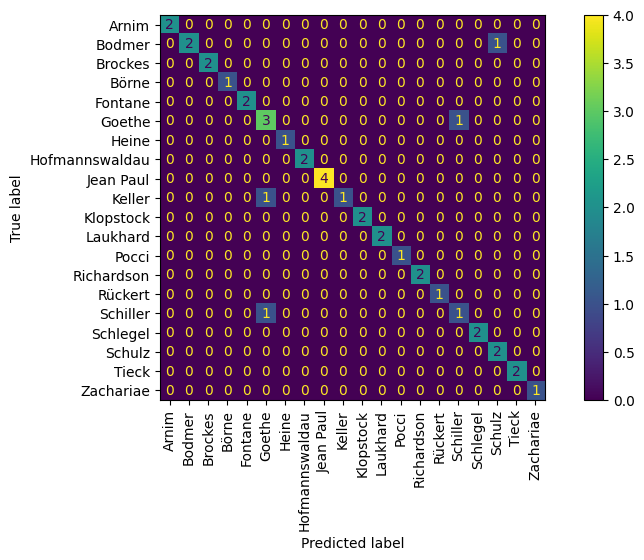

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

unique_labels = sorted(list(set(test_authors).union(set(nn_predictions)))) # get all authors from training and test and create a sorted list
conf_matrix = confusion_matrix(test_authors, nn_predictions, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)

fig, ax = plt.subplots(figsize=(10,5),dpi=100)
disp.plot(xticks_rotation=90, ax =ax)